用Python浅析股票数据
http://python.jobbole.com/87733/

This example will use visual method to illstrate stock info, such as drawing K-Diagram, and examine the index numbers' relation, finally use MA to study basic quantitative strategy.

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
 
%matplotlib inline
 
%config InlineBackend.figure_format = 'retina'
 
%pylab inline
 
pylab.rcParams['figure.figsize'] = (10, 6) #设置绘图尺寸
 
#读取数据
stock = ts.get_hist_data('002460', '2017-01-01', '2018-03-16')
# stock = stock[::-1]  #逆序排列
stock.head()

Populating the interactive namespace from numpy and matplotlib


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-03-16,81.50,82.26,79.00,78.80,247844.64,-2.54,-3.12,79.394,75.868,72.429,385195.16,360147.59,381373.52,4.73
2018-03-15,79.97,81.63,81.54,77.60,302940.19,2.55,3.23,77.970,75.078,71.179,383604.56,367894.53,382091.32,5.78
2018-03-14,78.75,84.00,78.99,78.50,457612.72,-0.25,-0.32,75.912,74.199,69.792,401858.19,379313.82,375137.25,8.73
2018-03-13,77.56,79.30,79.24,77.01,370773.38,1.04,1.33,74.952,73.538,68.475,402133.98,376453.36,363358.59,7.07
2018-03-12,72.37,78.98,78.20,72.03,546804.88,6.32,8.79,73.508,72.715,67.188,386808.14,373516.21,353796.85,10.52


In [2]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 2018-03-16 to 2017-01-03
Data columns (total 14 columns):
open            293 non-null float64
high            293 non-null float64
close           293 non-null float64
low             293 non-null float64
volume          293 non-null float64
price_change    293 non-null float64
p_change        293 non-null float64
ma5             293 non-null float64
ma10            293 non-null float64
ma20            293 non-null float64
v_ma5           293 non-null float64
v_ma10          293 non-null float64
v_ma20          293 non-null float64
turnover        293 non-null float64
dtypes: float64(14)
memory usage: 34.3+ KB


In [3]:
stock.columns

Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20', 'turnover'],
      dtype='object')

RSI的原理简单来说是以数字计算的方法求出买卖双方的力量对比.
强弱指标理论认为，任何市价的大涨或大跌，均在0-100之间变动，根据常态分配，认为RSI值多在30-70之间变动，通常80甚至90时被认为市场已到达超买状态，至此市场价格自然会回落调整。当价格低跌至30以下即被认为是超卖状态，市价将出现反弹回升。

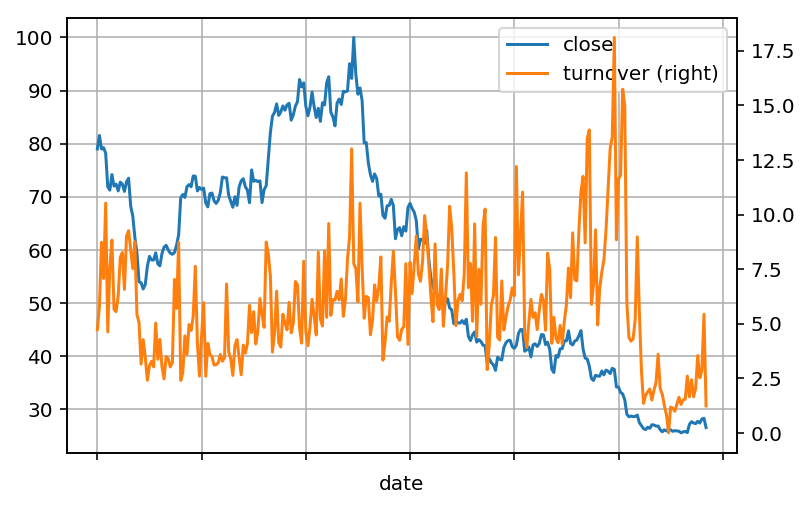

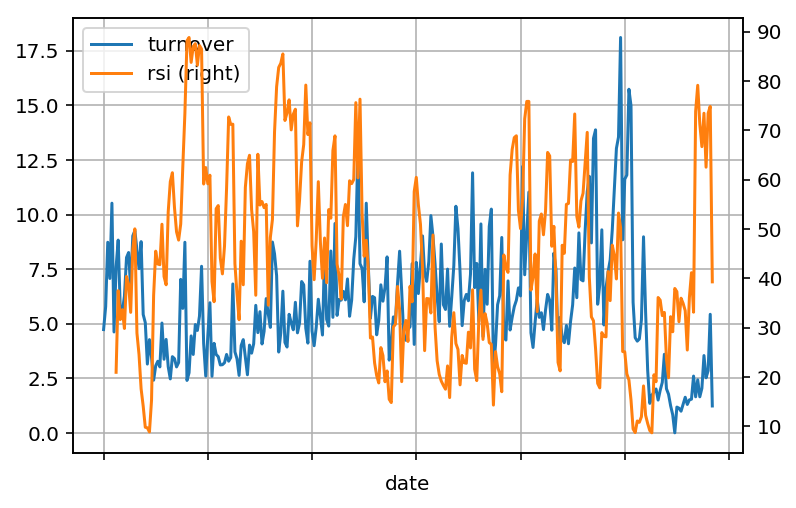

In [4]:
stock['rsi'] = talib.RSI(np.array(stock['close']), 6)
stock[['close', 'turnover']].plot(secondary_y='turnover', grid=True)
stock[['turnover', 'rsi']].plot(secondary_y='rsi', grid=True)